In [2]:
import pandas as pd
import xarray as xr
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# read runoff, loff, L/km2/s
LOFF = xr.open_dataset('../hydro-models/04_sample_setup/02_HYPE/results/timeLOFF.nc')

# # read local streamflow, cloc, m3/s
# CLOC = xr.open_dataset('../hydro-models/04_sample_setup/02_HYPE/results/timeCLOC.nc')

# # read streamflow, cout, m3/s
# COUT = xr.open_dataset('../hydro-models/04_sample_setup/02_HYPE/results/timeCOUT.nc')



In [28]:
riv = gpd.read_file('/home/shg096/scratch/West/domain/West_riv.shp')
cat = gpd.read_file('/home/shg096/scratch/West/domain/West_cat.shp')
riv['unitarea'] = cat['unitarea']

In [31]:
riv = riv[riv['COMID'].isin(GeoData['subid'])]
riv

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,hillslope,unitarea,width,geometry
192,71029450,0.092662,0.092662,1.000000,0.007551,352.395327,3,0.7,0.007551,71029448,2,71029800,71030243,0,0,0,0.010767,19.772196,"LINESTRING (-115.60500 51.34167, -115.60500 51..."
171,71029022,0.311067,0.301052,1.033267,0.006423,731.178489,3,2.0,0.006423,71029016,2,71029071,71029992,0,0,0,0.139727,28.040312,"LINESTRING (-116.17917 51.42083, -116.18000 51..."
219,71030057,0.391146,0.288165,1.357367,0.020664,103.208295,2,8.1,0.020664,71030035,2,71031922,71032117,0,0,0,0.160818,11.159148,"LINESTRING (-115.73000 51.54000, -115.73083 51..."
222,71030156,0.149912,0.108921,1.376330,0.007326,81.010000,2,1.1,0.007326,71029225,2,71032859,71032914,0,0,0,0.186380,10.000556,"LINESTRING (-115.11000 51.84250, -115.10917 51..."
145,71028681,0.621255,0.567689,1.094357,0.005949,529.609003,2,3.7,0.005949,71028510,2,71028734,71032673,0,0,0,0.202769,24.013235,"LINESTRING (-114.65417 51.75333, -114.65417 51..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,71030308,39.794365,27.978252,1.422332,0.011360,262.807634,2,453.0,0.011360,71029042,2,71031429,71031529,0,0,0,178.907815,17.211343,"LINESTRING (-115.01667 51.26667, -115.01750 51..."
232,71030292,31.857765,21.159843,1.505577,0.005979,260.203149,2,190.8,0.005979,71029212,2,71031785,71031855,0,0,0,183.991968,17.130814,"LINESTRING (-114.86583 51.60417, -114.86667 51..."
81,71025583,36.484166,13.434171,2.715774,0.001521,194.627549,1,55.6,0.001521,71023309,0,0,0,0,0,0,194.627549,14.950898,"LINESTRING (-114.68083 52.38667, -114.68083 52..."
17,71022409,45.555612,29.862568,1.525509,0.005011,221.602658,1,228.7,0.005011,71022253,0,0,0,0,0,0,221.602658,15.886325,"LINESTRING (-114.68167 52.06667, -114.68167 52..."


In [57]:
RFF = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH/results/RFF_D_GRD.nc')
RFF_slice = RFF.isel({'lat':0})
RFF_slice['RFF'].values


array([[6.9579506e+01, 7.8115112e+01, 6.9658661e+01, ..., 3.0914587e+01,
        3.8652813e+01, 3.5121911e+00],
       [4.0773044e+00, 3.5525725e+00, 3.4059098e+00, ..., 8.6662862e-03,
        6.1263945e-03, 6.8573519e-03],
       [0.0000000e+00, 6.0012290e-04, 5.8547710e-04, ..., 4.5374420e-02,
        1.9151491e-07, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
ds['RFF'][:,0,0].values

array([69.579506 ,  4.0773044,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
      dtype=float32)

array([69.579506 ,  4.0773044,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
      dtype=float32)

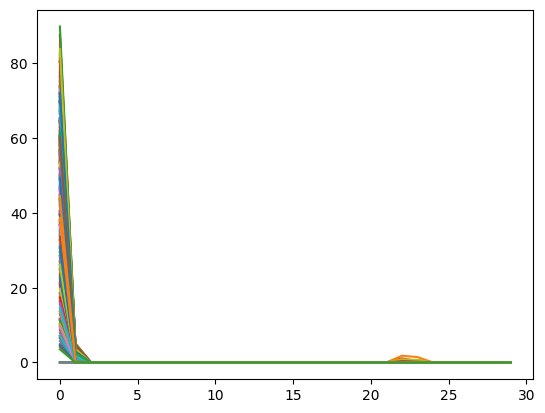

In [44]:
A = ds['RFF'][:,0,:].values
A
plt.plot(A)
A[:,0]

In [41]:
RFF_csv = pd.read_csv('../hydro-models/04_sample_setup/01_MESH/results/RFF_D.csv', header=None)
RFF_csv = RFF_csv.rename(columns={0: 'time'})
RFF_csv['time'] = pd.to_datetime(RFF_csv['time'])
RFF_csv = RFF_csv.set_index('time')
RFF_csv = RFF_csv.iloc[:, :-1] # drop the last column which is empty
#print(RFF_csv)

# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# convert csv files of discharge, its flag and station info to netCDF
Flow = esmr.dataframe_to_netcdf_xr(RFF_csv,
                                   data_frame_DateTime_column = 'time',
                                   variable_name = 'Flow',
                                   variable_dim_name = 'subbasin',
                                   unit_of_variable = 'mm day**-1',
                                   variable_long_name = 'daily runoff from MESH model',
                                   Fill_value = '-9999')

ddb = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH/MESH_drainage_database.nc')

Flow['Rank'] = xr.DataArray(ddb['Rank'].values, dims=('subbasin',), name='Rank')
Flow['segID'] = xr.DataArray(ddb['subbasin'].values, dims=('subbasin',), name='subbasin')

Flow.to_netcdf('../hydro-models/04_sample_setup/01_MESH/results/RFF_D.nc')

EASYMORE version 2.0.0 is initiated.
EASYMORE detects that the input datafarame is pandas dataframe
EASYMORE detects that index is pandas datatime


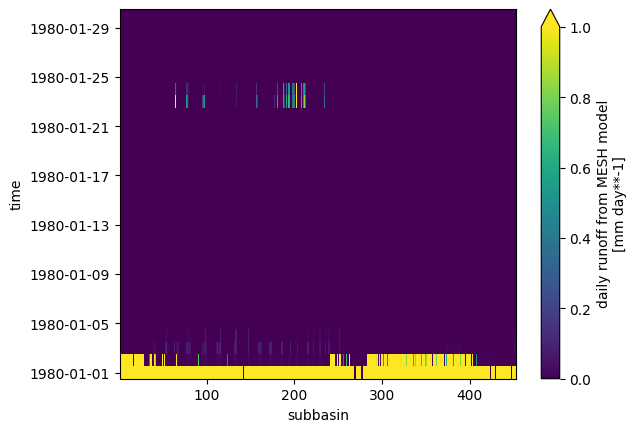

In [40]:
flow = xr.open_dataset('./test.nc')
flow['Flow'].plot(vmax =1)

In [42]:
Flow

<xarray.Dataset>
Dimensions:   (time: 30, subbasin: 453)
Coordinates:
  * time      (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-01-30
  * subbasin  (subbasin) object 1 2 3 4 5 6 7 8 ... 447 448 449 450 451 452 453
Data variables:
    Flow      (time, subbasin) float64 69.58 78.12 69.66 72.03 ... 0.0 0.0 0.0
    ID        (subbasin) int64 1 2 3 4 5 6 7 8 ... 447 448 449 450 451 452 453
    Rank      (subbasin) float64 1.0 2.0 3.0 4.0 5.0 ... 450.0 451.0 452.0 453.0
    segID     (subbasin) int64 71032106 71032073 71031850 ... 71034975 71027942

In [2]:
"""
Common functions for general tasks such as conversion of a csv file to nc for future
manupulaiton
"""

import hydrant.util.util as util        
        
data = util.mesh_output_txt_to_nc('/home/shg096/FHIMP/hydro-models/04_sample_setup/01_MESH/results/SNO_D.csv',
                             data_frame_DateTime_column = 'time',
                             variable_name = 'streamflow',
                             variable_dim_name = 'id',
                             unit_of_variable = 'm**3 s**-1',
                             variable_long_name = 'streamflow in river segments',
                             Fill_value = '-9999',
                             ddb_file = '/home/shg096/FHIMP/hydro-models/04_sample_setup/01_MESH/MESH_drainage_database.nc',
                             rank_var_ddb = 'Rank',
                             segID_var_ddb = 'subbasin',
                             nc_file_to_save = '/home/shg096/FHIMP/hydro-models/04_sample_setup/01_MESH/results/SNO_D.nc')

data

EASYMORE version 2.0.0 is initiated.
EASYMORE detects that the input datafarame is pandas dataframe
EASYMORE detects that index is pandas datatime


<xarray.Dataset>
Dimensions:     (time: 30, id: 453)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-01-30
  * id          (id) object 1 2 3 4 5 6 7 8 ... 446 447 448 449 450 451 452 453
Data variables:
    streamflow  (time, id) float64 0.06193 0.03386 0.01665 ... 12.16 10.75 15.59
    ID          (id) int64 1 2 3 4 5 6 7 8 9 ... 446 447 448 449 450 451 452 453
    Rank        (id) float64 1.0 2.0 3.0 4.0 5.0 ... 450.0 451.0 452.0 453.0
    segID       (id) int64 71032106 71032073 71031850 ... 71034975 71027942

In [ ]:
'../'

EASYMORE version 2.0.0 is initiated.
EASYMORE detects case 3 - irregular lat/lon; shapefile should be provided
EASYMORE detects that no variable for ID of the source netCDF file; an arbitatiry ID will be added
the closest time step to what is provided for vizualization  1980-01-24 00:00:00  is  1980-01-24 00:00:00  with step in the netcdf file:  23
min: 4.699518, max: 36.141 for variable: streamflow in source nc file for the time step: 1980-01-24 00:00:00


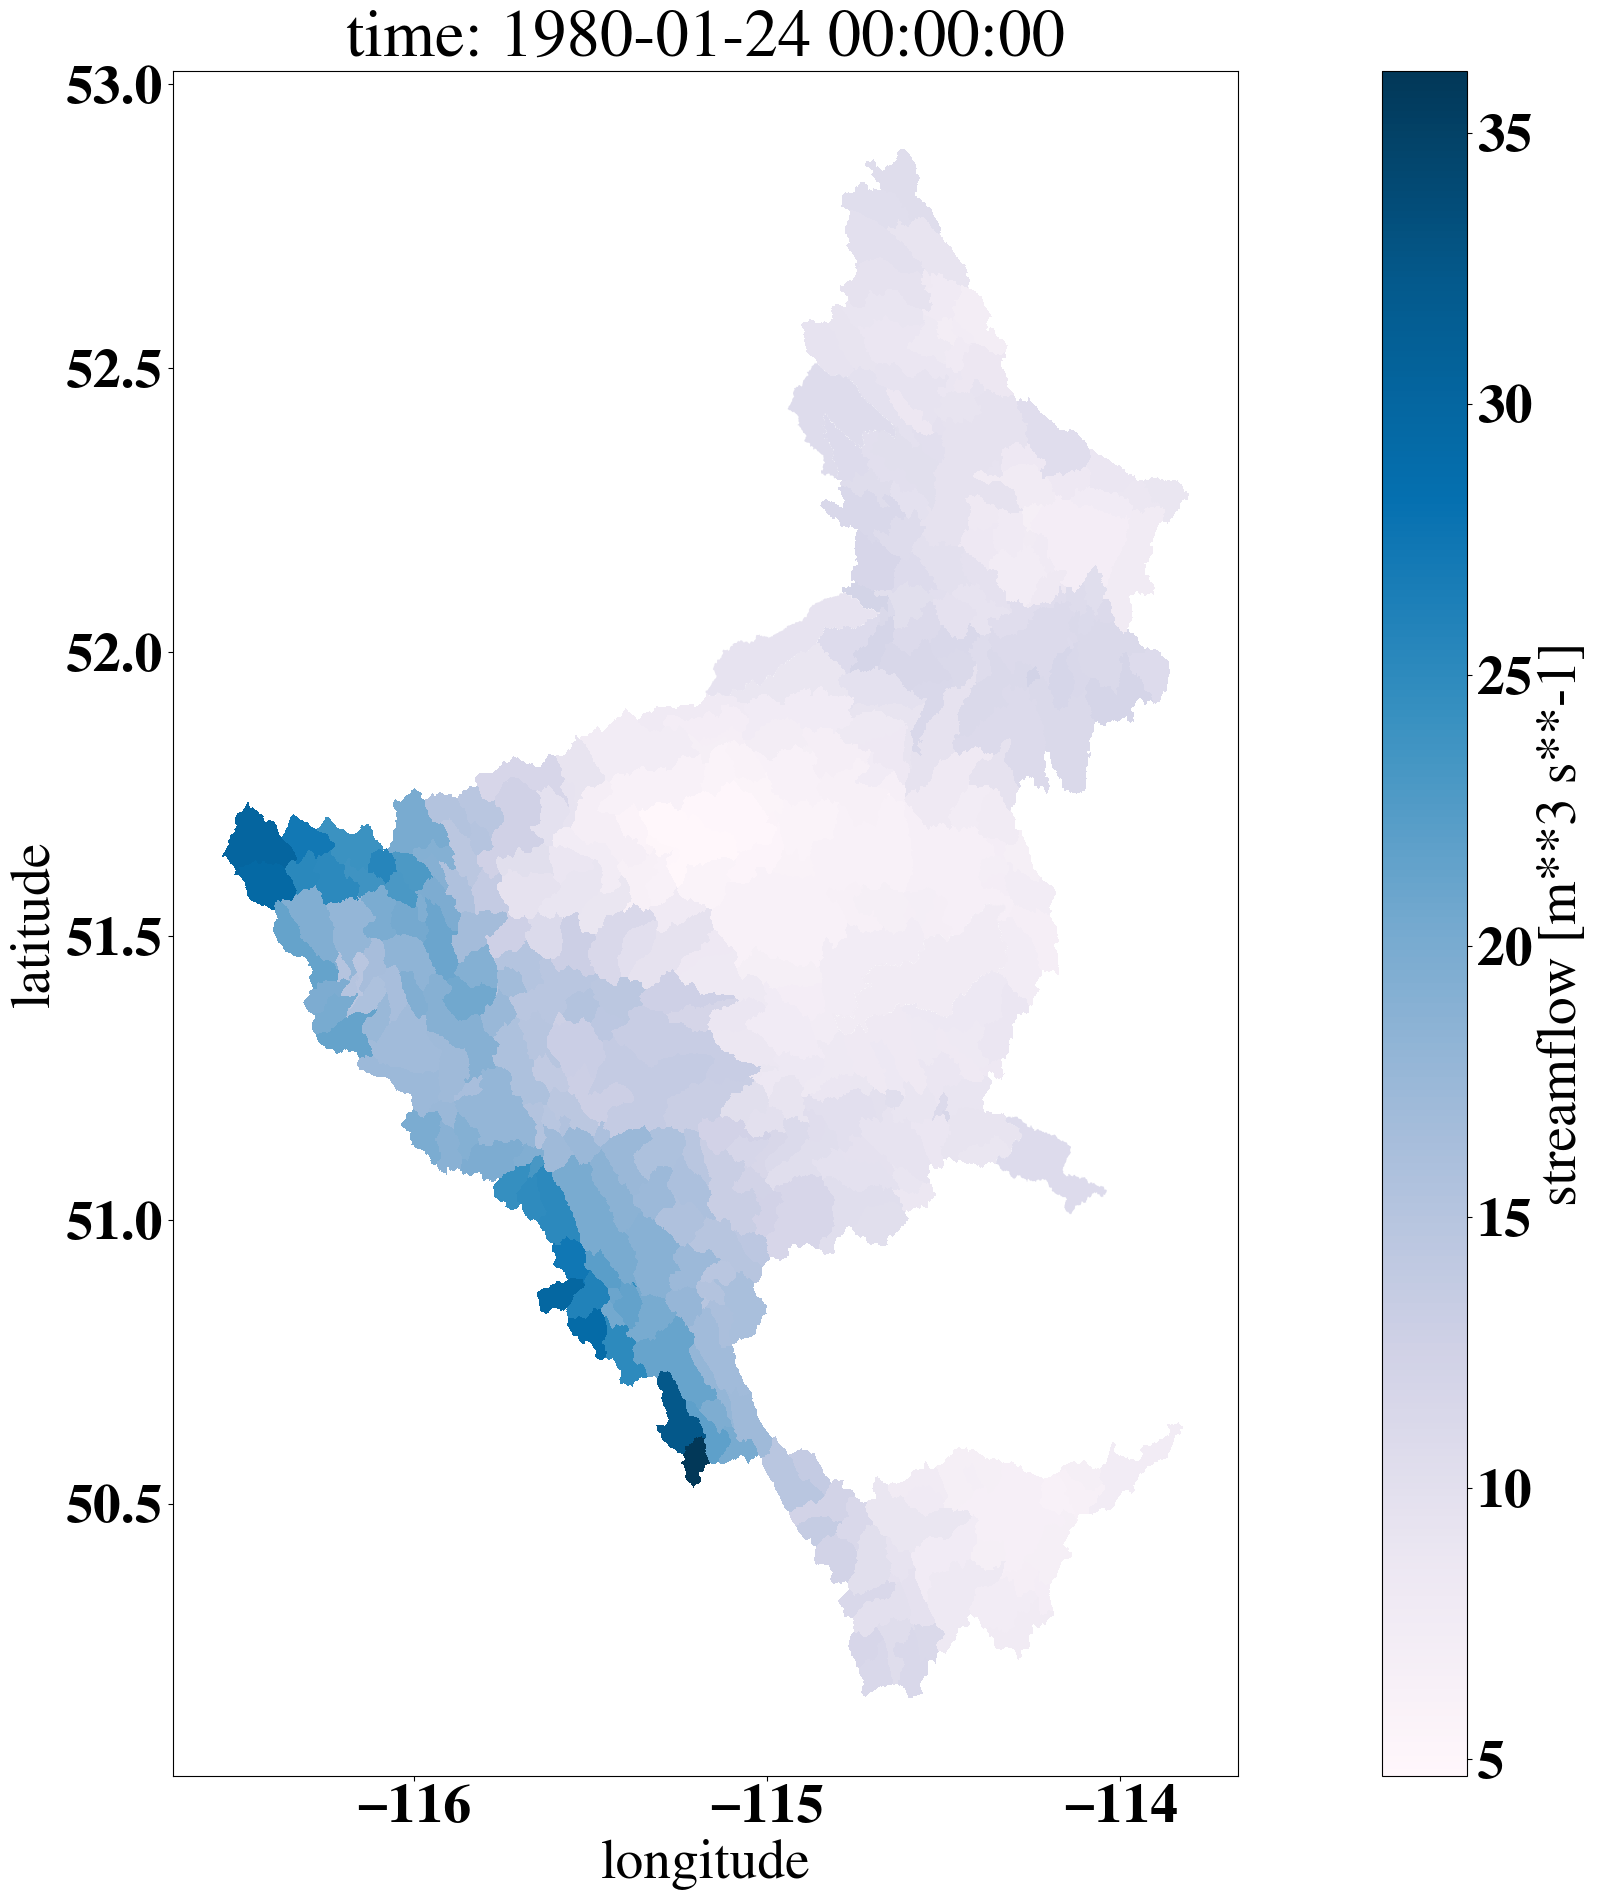

In [4]:
# loading EASYMORE for version 2.0.0 and later
from easymore import Easymore
# initializing EASYMORE object
esmr = Easymore()
 
# set the paramaters
case_name                       = 'Input_TMAX_HYPE'
source_nc_name                  = '../hydro-models/04_sample_setup/01_MESH/results/SNO_D.nc' # name of source nc file
source_nc_var_lon               = "segID" # lon in the source nc file
source_nc_var_lat               = "segID" # lat in the source nc file
source_nc_var_ID                = "segID" # ID in the source nc file
source_nc_var_time              = 'time' # variable time in the source nc file
source_nc_var_name              = 'streamflow'# variable from the source nc file
source_shp_name                 = '/home/shg096/scratch/West/domain/West_cat.shp' # source shapefile if case 3 such as station data; should be given or generated by EASYMORE
source_shp_field_ID             = "COMID" # the ID of the source shapefile
time_step_of_viz                = '1980-01-24 00:00:00' # it should be in form of 1990-02-01 00:00:00 
folder_save_fig                 = './fig/' # location where the fig should be saved
fig_size                        = (30,20) # the figure size
cmap                            = 'PuBu' #'viridis' #'PuBu' # the color 
linewidth_source                = 4 # linewidth for shapefile
edgecolor_source                = None #'k'
font_size                       = 40 # font size
font_family                     = 'Nimbus Roman'  #'Times New Roman' #  name of the font type
font_weigth                     = 'bold' # to be bold
add_colorbar_flag               = True # flag to add colorbar
min_lon,min_lat,max_lon,max_lat = None, None, None, None # if there is lat/lon to zoom in
 
# the source nc file
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_ID           = source_nc_var_ID,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            source_shp_name            = source_shp_name,              
            source_shp_field_ID        = source_shp_field_ID,
            linewidth_source           = linewidth_source,
            edgecolor_source           = edgecolor_source,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            fig_name                   = case_name+'_1.png',
            cmap                       = cmap,
            font_family                = font_family,
            add_colorbar_flag          = add_colorbar_flag,
            font_size                  = font_size,
            fig_size                   = fig_size)

In [7]:
import xarray as xr

ds = xr.open_dataset('../hydro-models/04_sample_setup/01_MESH/results/SNO_D.nc')
#ds['streamflow'] = ds['streamflow'].sum(dim='id')
ds

for var_name in ds.variables:
    # Check if the variable has both 'time' and 'segid' dimensions
    if 'time' in ds[var_name].dims and 'id' in ds[var_name].dims:
        ds[var_name]=ds[var_name].sum(dim='id')
    elif not 'time' in ds[var_name].dims:
        ds = ds.drop_vars(var_name)
ds

<xarray.Dataset>
Dimensions:     (time: 30)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-01-30
Data variables:
    streamflow  (time) float64 6.087 31.82 192.8 ... 7.166e+03 7.241e+03

In [10]:
df = ds.to_dataframe()

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10', '1980-01-11', '1980-01-12',
               '1980-01-13', '1980-01-14', '1980-01-15', '1980-01-16',
               '1980-01-17', '1980-01-18', '1980-01-19', '1980-01-20',
               '1980-01-21', '1980-01-22', '1980-01-23', '1980-01-24',
               '1980-01-25', '1980-01-26', '1980-01-27', '1980-01-28',
               '1980-01-29', '1980-01-30'],
              dtype='datetime64[ns]', name='time', freq=None)